<a href="https://colab.research.google.com/github/haruhiysd/QM-Group-Project/blob/main/Summary_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('merged_df_3(in).csv')
df

,Autonomous_community,Period,Monthly_number_of_tourists,GDP_per_capita,Unemployment_rate,HPI,total_waste_capita,Total_mixed_waste,Total_waste_no_CDW_and_other,Yearly_tourist_numbers
0,01 Andalucía,1/1/2007,NaN,NaN,NaN,127.081,NaN,NaN,NaN,NaN
1,02 Aragón,1/1/2007,NaN,NaN,NaN,175.582,NaN,NaN,NaN,NaN
2,"03 Asturias, Principado de",1/1/2007,NaN,NaN,NaN,138.726,NaN,NaN,NaN,NaN
3,"04 Balears, Illes",1/1/2007,NaN,NaN,NaN,134.284,NaN,NaN,NaN,NaN
4,05 Canarias,1/1/2007,NaN,NaN,NaN,132.560,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2715,"15 Navarra, Comunidad Foral de",1/11/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2716,16 País Vasco,1/11/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2717,"17 Rioja, La",1/11/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2718,Nacional,1/11/2024,5665204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
%matplotlib inline
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt
import numpy as np
import statistics
import pylab

#pylab.rcParams['figure.figsize'] = (10., 15.)
sns.set(font_scale=1.5)
sns.set_style("white")

In [2]:
df['Period'] = pd.to_datetime(df['Period'])

In [3]:
df = df[df['Period'] >= '2015-01-01'].reset_index(drop=True)
df

,Autonomous_community,Period,Monthly_number_of_tourists,GDP_per_capita,Unemployment_rate,HPI,total_waste_capita,Total_mixed_waste,Total_waste_no_CDW_and_other,Yearly_tourist_numbers
0,01 Andalucía,2015-01-01,NaN,NaN,NaN,96.637,504.6,3734660.0,4132582.0,NaN
1,02 Aragón,2015-01-01,NaN,NaN,NaN,98.632,427.9,457726.0,532954.0,NaN
2,"03 Asturias, Principado de",2015-01-01,NaN,NaN,NaN,97.509,519.4,404159.0,519529.0,NaN
3,"04 Balears, Illes",2015-01-01,NaN,NaN,NaN,95.424,800.6,766736.0,892903.0,NaN
4,05 Canarias,2015-01-01,NaN,NaN,NaN,97.087,594.1,1144978.0,1253565.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2139,"15 Navarra, Comunidad Foral de",2024-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140,16 País Vasco,2024-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2141,"17 Rioja, La",2024-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2142,Nacional,2024-01-11,5665204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
summary=df.describe().round(2)  # generate summary statistics, and round everything to 2 decimal degrees
summary=summary.T #.T transposes the table (rows become columns and vice versa)
summary

,count,mean,min,25%,50%,75%,max,std
Period,2144,2019-09-21 08:14:19.701492480,2015-01-01 00:00:00,2017-01-11 00:00:00,2020-01-03 00:00:00,2022-01-07 00:00:00,2024-01-11 00:00:00,NaN
Monthly_number_of_tourists,880.0,1437902.16,0.0,447236.5,824550.0,1302553.5,10930750.0,2002757.18
GDP_per_capita,576.0,26026.03,17239.0,21923.25,25088.0,29591.5,42198.0,5292.8
Unemployment_rate,630.0,14.09,5.61,10.54,13.0,16.62,29.7,4.68
HPI,702.0,119.93,95.42,104.64,116.14,131.53,178.65,17.41
total_waste_capita,144.0,479.69,354.1,432.85,464.1,509.68,811.9,77.48
Total_mixed_waste,144.0,1984408.72,104299.0,436797.5,792762.5,1941388.5,18284563.0,3984459.1
Total_waste_no_CDW_and_other,144.0,2454683.69,126862.0,518515.5,933241.0,2374557.75,23029781.0,4925900.17
Yearly_tourist_numbers,144.0,7365988.89,45355.0,319093.0,1175696.5,8693823.5,85169050.0,16324537.77


Text(69.75, 0.5, 'Unemployment Rate')

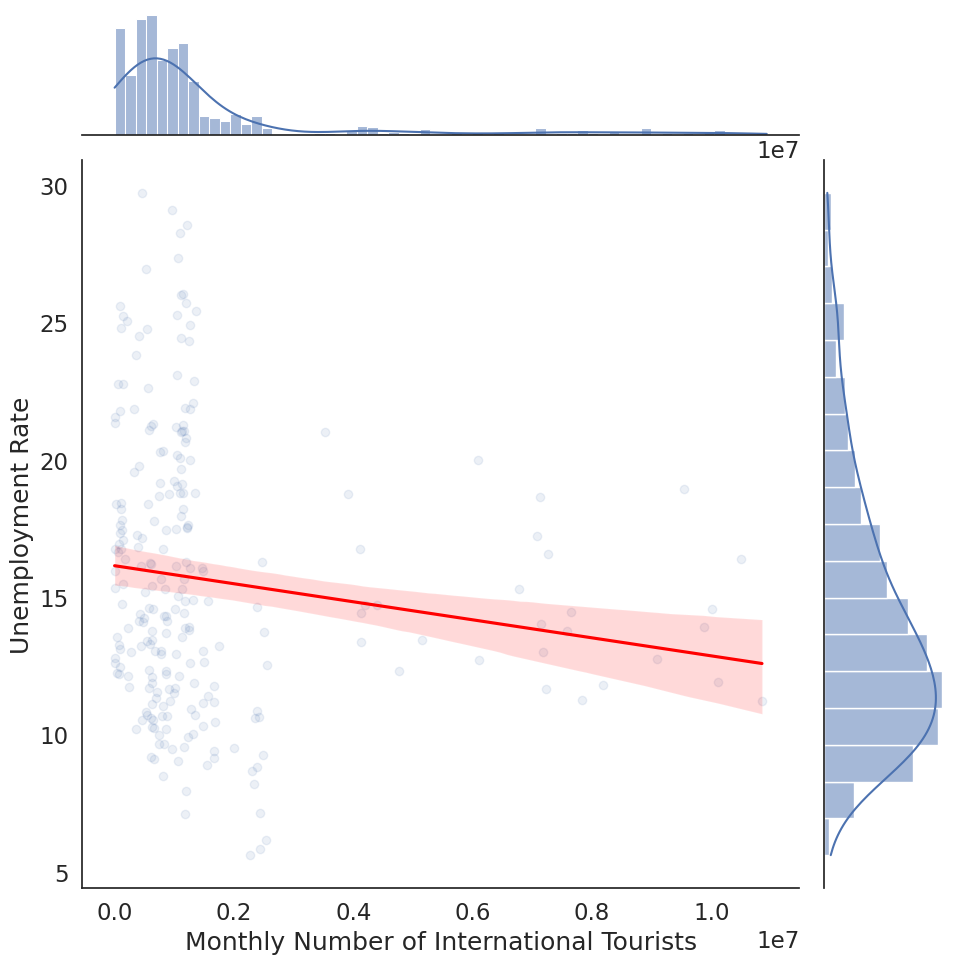

In [7]:
sns.jointplot(data=df, # plot a scatterplot with a regression line and two histograms
                x='Monthly_number_of_tourists', # set the x axis to be the years of schooling
                y='Unemployment_rate', # set the y axis to be the hourly wage
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.1), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches

plt.xlabel('Monthly Number of International Tourists') # add a label to the x axis
plt.ylabel('Unemployment Rate') # add a label to the y axis